In [1]:
#import useful libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pickle
import configuration
import general_statistics as stats
import figures as figs
import matplotlib.cm as cm
from matplotlib import colors
from scipy import signal
from scipy import stats as sstats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy
cmap = cm.jet
import math
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import cross_val_score
import random
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
input_directory = os.environ['PROJECT_DIR'] + 'neural_analysis/figures/mean_representational_distance/lda_3/'
figure_path = os.environ['PROJECT_DIR'] +'neural_analysis/figures/mean_representational_distance/lda_3/non_nan/'


In [2]:
file_2 = 'prob_product_overlapping.npy'
file_1 = 'cumulative_exp_time_sum_overlapping.npy'
file_3 = 'neural_overlapping.npy'
exp_time_overlapping = np.load(input_directory + file_1)
prob_overlapping = np.load(input_directory + file_2)
neural_overlapping = np.load(input_directory + file_3, allow_pickle=True)

     
file_2 = 'prob_product__random.npy'
file_1 = 'cumulative_exp_time_sum_random.npy'  
file_3 = 'neural_random.npy'
exp_time_random = np.load(input_directory + file_1)
prob_random = np.load(input_directory + file_2)
neural_random = np.load(input_directory + file_3, allow_pickle=True)

file_2 = 'prob_product__stable.npy'
file_1 = 'cumulative_exp_time_sum_stable.npy' 
file_3 = 'neural_stable.npy'
exp_time_stable= np.load(input_directory + file_1)
prob_stable = np.load(input_directory + file_2)
neural_stable = np.load(input_directory + file_3, allow_pickle=True)

correlation = np.zeros((20,))
correlation1 = np.zeros((20,))
correlation2 = np.zeros((20,))

for i in range(20):
    x = np.concatenate((exp_time_overlapping[0][:,i],exp_time_random[0][:,i],exp_time_stable[0][[0,2,3,4],i],
                       exp_time_overlapping[1][:,i],exp_time_random[1][:,i],exp_time_stable[1][[0,2,3,4],i],
                       exp_time_overlapping[2][:,i],exp_time_overlapping[3][:,i],exp_time_random[2][:,i],exp_time_stable[2][[0,2,3,4],i]))
     
    y = np.concatenate((prob_overlapping[0][:,i],prob_random[0][:,i],prob_stable[0][:,i],
                        prob_overlapping[1][:,i],prob_random[1][:,i],prob_stable[1][:,i],
                       prob_overlapping[2][:,i],prob_overlapping[3][:,i],prob_random[2][:,i],prob_stable[2][:,i]))
    
    a = np.mean(neural_overlapping[2][:,i].reshape(2,5),axis = 0)
    b = np.mean(neural_overlapping[3][:,i].reshape(2,5),axis = 0)   
    c = np.mean(neural_random[2][:,i].reshape(4,5),axis = 0)
    d = np.mean(neural_stable[2][:,i].reshape(4,4),axis = 0)
    z = np.concatenate((neural_overlapping[0][:,i],neural_random[0][:,i],neural_stable[0][:,i],
                       neural_overlapping[1][:,i],neural_random[1][:,i],neural_stable[1][:,i],
                       a,b,c,d))
    corr = np.corrcoef(x,y)
    corr1 = np.corrcoef(x,z)
    corr2 = np.corrcoef(y,z)
    
    if np.isnan(corr[0,1]) == False and np.isnan(corr1[0,1]) == False and np.isnan(corr2[0,1]) == False :
        correlation[i] = corr[0,1]
        correlation1[i] = corr1[0,1]
        correlation2[i] = corr2[0,1]
     


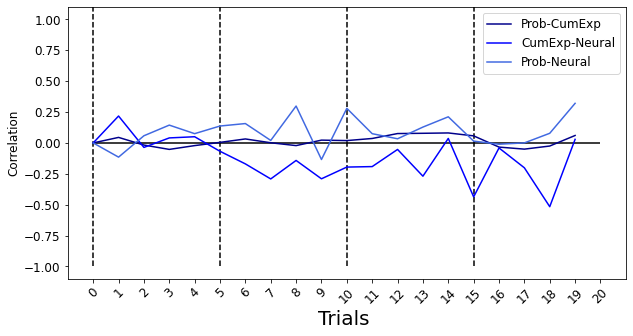

In [8]:
random_mean_occ= correlation
stable_mean_occ = correlation1
overlapping_mean_occ = correlation2
color_random = ['darkblue','blue','royalblue']
color_stable = ['blue','red','tomato']
color_overlapping = ['royalblue','limegreen','y','cyan']

figure, axes = plt.subplots()

time = np.arange(0,20)
axes.plot(time,random_mean_occ[time],'darkblue')
axes.plot(time,stable_mean_occ[time],'blue')
axes.plot(time,overlapping_mean_occ[time],'royalblue')

axes.set_ylim([-1.1,1.1])
axes.set_ylabel('Correlation',fontsize = 12)
axes.tick_params(axis='x', labelsize=12)
axes.set_xticks(np.arange(0,21))

axes.tick_params(axis='y', labelsize=12)  
for tick in axes.get_xticklabels():
    tick.set_rotation(45)
axes.hlines(0,0,20,color = 'k')  
axes.legend(['Prob-CumExp','CumExp-Neural','Prob-Neural'], fontsize = 12)
axes.vlines([0,5,10,15], -1, 3, colors='k', linestyles='dashed')

axes.set_xlabel('Trials ',fontsize = 20)

figure.set_size_inches([10,5])
figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_mix_conditionandcategory.png')

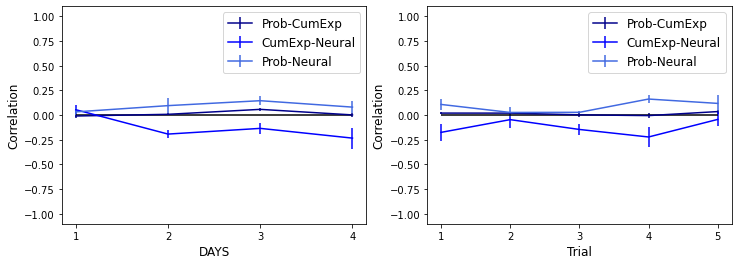

In [7]:
random = correlation.reshape(4,5)
stable = correlation1.reshape(4,5)
overlapping = correlation2.reshape(4,5)
titles = ['Prob-CumExp','CumExp-Neural','Prob-Neural']
figure, axes = plt.subplots(1,2)

trials = np.arange(0,5)
axes[1].errorbar(trials,np.nanmean(random,axis = 0),np.nanstd(random,axis = 0)/np.sqrt(random.shape[0]),color = color_random[0])
axes[1].errorbar(trials,np.nanmean(stable,axis = 0),np.nanstd(stable,axis = 0)/np.sqrt(stable.shape[0]),color = color_stable[0])
axes[1].errorbar(trials,np.nanmean(overlapping,axis = 0),np.nanstd(overlapping,axis = 0)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0])

trials = np.arange(0,4)
axes[0].errorbar(trials,np.nanmean(random,axis = 1),np.nanstd(random,axis = 1)/np.sqrt(random.shape[0]),color = color_random[0])
axes[0].errorbar(trials,np.nanmean(stable,axis = 1),np.nanstd(stable,axis = 1)/np.sqrt(stable.shape[0]),color = color_stable[0])
axes[0].errorbar(trials,np.nanmean(overlapping,axis = 1),np.nanstd(overlapping,axis = 1)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0])

for j in range(2):
    axes[j].set_ylim([-1.1,1.1])
        
trials_comparison_pos = [0,1,2,3,4]
tick_label = ['1','2','3','4','5']

axes[1].set_xticks(trials_comparison_pos)
axes[1].set_xlabel('Trial', fontsize = 12)
axes[1].set_ylabel('Correlation', fontsize = 12)
axes[1].set_xticklabels(tick_label)
axes[1].legend(titles,fontsize= 12)
axes[1].hlines(0,0,4,color = 'k')  

trials_comparison_pos = [0,1,2,3]
tick_label = ['1','2','3','4']
axes[0].set_xticks(trials_comparison_pos)
axes[0].set_xlabel('DAYS', fontsize = 12)
axes[0].set_ylabel('Correlation', fontsize = 12)
axes[0].set_xticklabels(tick_label)
axes[0].legend(titles,fontsize= 12)
axes[0].hlines(0,0,3,color = 'k')  

figure.set_size_inches([12,4])

figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_mix_condition_and_category2.png')

In [129]:
file_2 = 'prob_product_overlapping.npy'
file_1 = 'cumulative_exp_time_sum_overlapping.npy'
file_3 = 'neural_overlapping.npy'
exp_time_overlapping = np.load(input_directory + file_1)
prob_overlapping = np.load(input_directory + file_2)
neural_overlapping = np.load(input_directory + file_3, allow_pickle=True)

     
file_2 = 'prob_product__random.npy'
file_1 = 'cumulative_exp_time_sum_random.npy'  
file_3 = 'neural_random.npy'
exp_time_random = np.load(input_directory + file_1)
prob_random = np.load(input_directory + file_2)
neural_random = np.load(input_directory + file_3, allow_pickle=True)

file_2 = 'prob_product__stable.npy'
file_1 = 'cumulative_exp_time_sum_stable.npy' 
file_3 = 'neural_stable.npy'
exp_time_stable= np.load(input_directory + file_1)
prob_stable = np.load(input_directory + file_2)
neural_stable = np.load(input_directory + file_3, allow_pickle=True)

correlation = np.zeros((20,))
correlation1 = np.zeros((20,))
correlation2 = np.zeros((20,))

i = 0
cond = np.array([0,0,0,0,0,1,1,1,1,1,2,2,2,2,0,0,0,0,0,1,1,1,1,1,2,2,2,2,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2])
cat = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2])

repeat1= cond.copy()
repeat2=cat.copy()
x1 = np.concatenate((exp_time_overlapping[0][:,i],exp_time_random[0][:,i],exp_time_stable[0][[0,2,3,4],i],
                       exp_time_overlapping[1][:,i],exp_time_random[1][:,i],exp_time_stable[1][[0,2,3,4],i],
                       exp_time_overlapping[2][:,i],exp_time_overlapping[3][:,i],exp_time_random[2][:,i],exp_time_stable[2][[0,2,3,4],i]))

y1 = np.concatenate((prob_overlapping[0][:,i],prob_random[0][:,i],prob_stable[0][:,i],
                        prob_overlapping[1][:,i],prob_random[1][:,i],prob_stable[1][:,i],
                       prob_overlapping[2][:,i],prob_overlapping[3][:,i],prob_random[2][:,i],prob_stable[2][:,i]))

a = np.mean(neural_overlapping[2][:,i].reshape(2,5),axis = 0)
b = np.mean(neural_overlapping[3][:,i].reshape(2,5),axis = 0)   
c = np.mean(neural_random[2][:,i].reshape(4,5),axis = 0)
d = np.mean(neural_stable[2][:,i].reshape(4,4),axis = 0)
z1 = np.concatenate((neural_overlapping[0][:,i],neural_random[0][:,i],neural_stable[0][:,i],
                       neural_overlapping[1][:,i],neural_random[1][:,i],neural_stable[1][:,i],
                       a,b,c,d))

for i in range(1,5):
    x1 = np.concatenate((x1,exp_time_overlapping[0][:,i],exp_time_random[0][:,i],exp_time_stable[0][[0,2,3,4],i],
                       exp_time_overlapping[1][:,i],exp_time_random[1][:,i],exp_time_stable[1][[0,2,3,4],i],
                       exp_time_overlapping[2][:,i],exp_time_overlapping[3][:,i],exp_time_random[2][:,i],exp_time_stable[2][[0,2,3,4],i]))
    y1 = np.concatenate((y1,prob_overlapping[0][:,i],prob_random[0][:,i],prob_stable[0][:,i],
                        prob_overlapping[1][:,i],prob_random[1][:,i],prob_stable[1][:,i],
                       prob_overlapping[2][:,i],prob_overlapping[3][:,i],prob_random[2][:,i],prob_stable[2][:,i]))
    a = np.mean(neural_overlapping[2][:,i].reshape(2,5),axis = 0)
    b = np.mean(neural_overlapping[3][:,i].reshape(2,5),axis = 0)   
    c = np.mean(neural_random[2][:,i].reshape(4,5),axis = 0)
    d = np.mean(neural_stable[2][:,i].reshape(4,4),axis = 0)
    z1 = np.concatenate((z1,neural_overlapping[0][:,i],neural_random[0][:,i],neural_stable[0][:,i],
                       neural_overlapping[1][:,i],neural_random[1][:,i],neural_stable[1][:,i],
                       a,b,c,d))
    cond = np.concatenate((cond,repeat1))
    cat = np.concatenate((cat,repeat2))
    
i = 5
x2 = np.concatenate((exp_time_overlapping[0][:,i],exp_time_random[0][:,i],exp_time_stable[0][[0,2,3,4],i],
                       exp_time_overlapping[1][:,i],exp_time_random[1][:,i],exp_time_stable[1][[0,2,3,4],i],
                       exp_time_overlapping[2][:,i],exp_time_overlapping[3][:,i],exp_time_random[2][:,i],exp_time_stable[2][[0,2,3,4],i]))
    
y2 = np.concatenate((prob_overlapping[0][:,i],prob_random[0][:,i],prob_stable[0][:,i],
                        prob_overlapping[1][:,i],prob_random[1][:,i],prob_stable[1][:,i],
                       prob_overlapping[2][:,i],prob_overlapping[3][:,i],prob_random[2][:,i],prob_stable[2][:,i]))
a = np.mean(neural_overlapping[2][:,i].reshape(2,5),axis = 0)
b = np.mean(neural_overlapping[3][:,i].reshape(2,5),axis = 0)   
c = np.mean(neural_random[2][:,i].reshape(4,5),axis = 0)
d = np.mean(neural_stable[2][:,i].reshape(4,4),axis = 0)
z2 = np.concatenate((neural_overlapping[0][:,i],neural_random[0][:,i],neural_stable[0][:,i],
                       neural_overlapping[1][:,i],neural_random[1][:,i],neural_stable[1][:,i],
                       a,b,c,d))
cond2 = repeat1.copy()
cat2 = repeat2.copy()
for i in range(6,20):
    x2 = np.concatenate((x2,exp_time_overlapping[0][:,i],exp_time_random[0][:,i],exp_time_stable[0][[0,2,3,4],i],
                       exp_time_overlapping[1][:,i],exp_time_random[1][:,i],exp_time_stable[1][[0,2,3,4],i],
                       exp_time_overlapping[2][:,i],exp_time_overlapping[3][:,i],exp_time_random[2][:,i],exp_time_stable[2][[0,2,3,4],i]))
    
    y2 = np.concatenate((y2,prob_overlapping[0][:,i],prob_random[0][:,i],prob_stable[0][:,i],
                        prob_overlapping[1][:,i],prob_random[1][:,i],prob_stable[1][:,i],
                       prob_overlapping[2][:,i],prob_overlapping[3][:,i],prob_random[2][:,i],prob_stable[2][:,i]))
    a = np.mean(neural_overlapping[2][:,i].reshape(2,5),axis = 0)
    b = np.mean(neural_overlapping[3][:,i].reshape(2,5),axis = 0)   
    c = np.mean(neural_random[2][:,i].reshape(4,5),axis = 0)
    d = np.mean(neural_stable[2][:,i].reshape(4,4),axis = 0)
    z2 = np.concatenate((z2,neural_overlapping[0][:,i],neural_random[0][:,i],neural_stable[0][:,i],
                       neural_overlapping[1][:,i],neural_random[1][:,i],neural_stable[1][:,i],
                       a,b,c,d))   
    cond2 = np.concatenate((cond2,repeat1))
    cat2 = np.concatenate((cat2,repeat2))
    
corr = np.corrcoef(x1,y1)
corr1 = np.corrcoef(x1,z1)
corr2 = np.corrcoef(y1,z1)

corr_ = np.corrcoef(x2,y2)
corr1_ = np.corrcoef(x2,z2)
corr2_ = np.corrcoef(y2,z2)

In [130]:
correlation1 = [corr1[0,1],corr1_[0,1]]
correlation2 = [corr2[0,1],corr2_[0,1]]


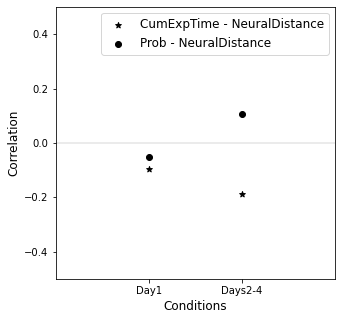

In [131]:
figure, axes = plt.subplots()
axes.scatter([1,2],correlation1, color = 'k', marker = '*')
axes.scatter([1,2],correlation2, color = 'k', marker = 'o')
axes.set_xlim([0,3])
axes.set_ylim([-0.5,0.5])


trials_comparison_pos = [1,2]
tick_label = ['Day1','Days2-4']
axes.set_xticks(trials_comparison_pos)
axes.set_xlabel('Conditions', fontsize = 12)
axes.set_ylabel('Correlation', fontsize = 12)
axes.set_xticklabels(tick_label)
axes.legend(['CumExpTime - NeuralDistance','Prob - NeuralDistance'],fontsize= 12)
axes.hlines(0,0,3,color = 'k', alpha = 0.1)  

figure.set_size_inches([5,5])
figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_mix_condition_and_category_mix_days.png')

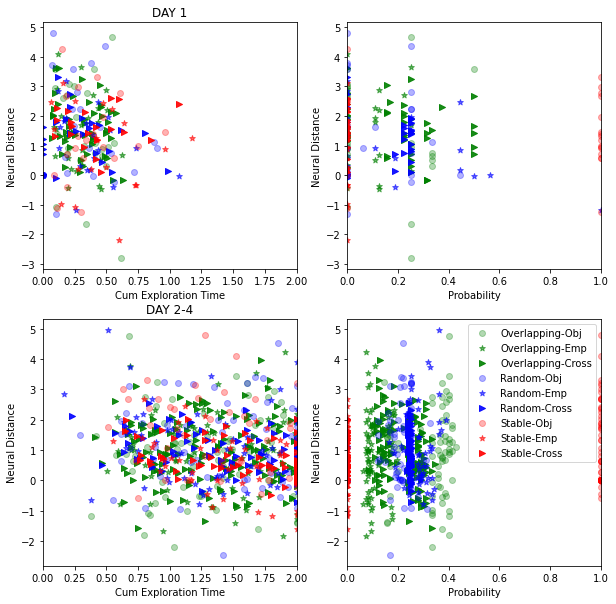

In [143]:
figure, axes = plt.subplots(2,2)
colors = ['g','b','r']
markers = ['o','*','>']
alphas = [0.3,0.6,0.9]

legends = ['Overlapping-Obj','Overlapping-Emp','Overlapping-Cross','Random-Obj','Random-Emp','Random-Cross','Stable-Obj','Stable-Emp','Stable-Cross']
for i in range(3):
    for j in range(3):
        index1 = np.logical_and(cond==i,cat==j)
        axes[0,0].scatter(x1[index1],z1[index1], color = colors[i], marker = markers[j],alpha = alphas[j])
        axes[0,1].scatter(y1[index1],z1[index1], color = colors[i], marker = markers[j],alpha = alphas[j])

axes[0,0].set_xlabel('Cum Exploration Time')
axes[0,0].set_xlim([0,2])
axes[0,1].set_xlabel('Probability')
axes[0,1].set_xlim([0,1])
axes[0,0].set_title('DAY 1')
for i in range(3):
    for j in range(3):
        index1 = np.logical_and(cond2==i,cat2==j)
        axes[1,0].scatter(x2[index1],z2[index1], color = colors[i], marker = markers[j],alpha = alphas[j])

        axes[1,1].scatter(y2[index1],z2[index1], color = colors[i], marker = markers[j],alpha = alphas[j])

axes[1,0].set_xlabel('Cum Exploration Time')
axes[1,0].set_xlim([0,2])
axes[1,1].set_xlabel('Probability')
axes[1,1].set_xlim([0,1])
axes[1,0].set_title('DAY 2-4')


for i in range(2):
    for j in range(2):
        axes[i,j].set_ylabel('Neural Distance')

axes[1,1].legend(legends)
figure.set_size_inches([10,10])
figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_mix_condition_and_category_mix_days_scatter.png')

In [91]:
exp_time_overlapping[0][:,i]

array([0.09428092, 0.10471559, 0.10745237, 0.15863902, 0.0911805 ])

In [90]:
len(cond)

48

In [17]:
c

array([-0.0500859 , -0.0948968 , -0.73061957,  0.18982333,  0.64240963])